<a href="https://colab.research.google.com/github/desikaputri/202131103_DESI-IKA-PUTRI_UAS_Pemsin_B/blob/main/EX_N_ABS_SUMMARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install contractions

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy scipy gensim

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)


In [ ]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import math
from gensim.models import Word2Vec, FastText # Import FastText
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input, Concatenate
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#membaca data
data = pd.read_excel('Emirate.xlsx', index_col=0)
data.head()

,web-scraper-start-url,Title,rate,recommended,Text,sentiment Class
web-scraper-order,,,,,,
1715571696-1,https://www.airlinequality.com/airline-reviews...,"""one of my worst nightmares""",1/10,no,"Not Verified | On 3/9/2024, I transferred mo...",0
1715571696-2,https://www.airlinequality.com/airline-reviews...,“I feel scammed”,1/10,no,✅ Trip Verified | I have a business class tick...,0
1715571696-3,https://www.airlinequality.com/airline-reviews...,"""Seat quality was average""",6/10,yes,✅ Trip Verified | Traveled from Dhaka to Lyo...,1
1715571696-4,https://www.airlinequality.com/airline-reviews...,"""unfriendly and rude""",2/10,no,✅ Trip Verified | I’ve flown Emirates a few t...,0
1715571696-5,https://www.airlinequality.com/airline-reviews...,"""never fly Emirates again""",1/10,no,✅ Trip Verified | I have just collected my ba...,0


In [ ]:
data.to_csv('Emirate.csv', index=False)

print("File berhasil dikonversi dan disimpan sebagai Emirate.csv")

File berhasil dikonversi dan disimpan sebagai Emirate.csv


In [ ]:
data = pd.read_csv("Emirate.csv")
data.head()

,web-scraper-start-url,Title,rate,recommended,Text,sentiment Class
0,https://www.airlinequality.com/airline-reviews...,"""one of my worst nightmares""",1/10,no,"Not Verified | On 3/9/2024, I transferred mo...",0
1,https://www.airlinequality.com/airline-reviews...,“I feel scammed”,1/10,no,✅ Trip Verified | I have a business class tick...,0
2,https://www.airlinequality.com/airline-reviews...,"""Seat quality was average""",6/10,yes,✅ Trip Verified | Traveled from Dhaka to Lyo...,1
3,https://www.airlinequality.com/airline-reviews...,"""unfriendly and rude""",2/10,no,✅ Trip Verified | I’ve flown Emirates a few t...,0
4,https://www.airlinequality.com/airline-reviews...,"""never fly Emirates again""",1/10,no,✅ Trip Verified | I have just collected my ba...,0


#PREPROCESSING

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
import re
from nltk.corpus import stopwords

def preprocess(text):
    text = str(text)
    # 1. Bersihkan Tanda Spesifik (jika ada seperti "Trip Verified")
    text = re.sub(r'Trip Verified','', text)
    text = re.sub(r'Verified Review','', text)
    text = re.sub(r'Not Verified','', text)
    # Hapus tanda titik lebih dari 1
    text = re.sub(r'\.{1,}', '.', text)
    # 2. Perluas Kontraksi (penting untuk menjaga makna dan flow kalimat)"don't" -> "do not"
    words_expanded = []
    for word in text.split(" "):
        if word.lower() in contraction_mapping:
            words_expanded.append(contraction_mapping[word.lower()])
        else:
            words_expanded.append(word)
    text = " ".join(words_expanded)
    # 3. Case Folding (ubah ke huruf kecil)
    text = text.lower()
    # Handle kata yang menempel (misal: "extraLegRoom" -> "extra leg room")
    text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', text)
    # 4. Remove URLs and HTML tags (elemen yang tidak relevan)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    # 5. Remove Special Characters (Hanya hapus yang TIDAK penting untuk struktur kalimat)
    text = re.sub(r'[^a-zA-Z0-9.,?!;:\s]', '', text)
    # 6. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # 7. Tokenisasi Kata, NLTK's word_tokenize akan memisahkan "halo." menjadi ["halo", "."]
    tokens = word_tokenize(text)
    return " ".join(tokens)

In [ ]:
data['Original_Text'] = data['Text']

In [ ]:
data['Text'] = data['Text'].apply(preprocess)

EXTRACTIVE SUMMARY

In [ ]:
def extractive_summary(text, top_n=2):
    sentences = sent_tokenize(text)

    if len(sentences) <= top_n:
        return " ".join(sentences)

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(sentences)
    sentence_scores = tfidf_matrix.sum(axis=1).A1  # convert to 1D array

    top_sentences_idx = np.argsort(sentence_scores)[::-1][:top_n]
    top_sentences_idx.sort()  # maintain original order

    selected = [sentences[i] for i in top_sentences_idx]
    return " ".join(selected)

In [ ]:
# Buat kolom baru hasil ringkasan ekstraktif
data["Summary"] = data["Text"].apply(lambda x: extractive_summary(x, top_n=2))

Data Splitting, dengan data latih 80% dan data uji 20%

In [ ]:
def split_data(data, test_size=0.2, random_state=42):
    train_df, test_df = train_test_split(
        data, test_size=test_size, random_state=random_state, shuffle=True
    )
    print(f"Data asli: {len(data)} samples")
    print(f"Data train: {len(train_df)} samples ({len(train_df)/len(data)*100:.1f}%)")
    print(f"Data test: {len(test_df)} samples ({len(test_df)/len(data)*100:.1f}%)")
    return train_df, test_df

train_df, test_df = split_data(data)

Data asli: 1082 samples
Data train: 865 samples (79.9%)
Data test: 217 samples (20.1%)


In [ ]:
data[["Text", "Summary"]].head()

,Text,Summary
0,"on 392024 , i transferred more than 300,000 po...",the customer service agents were not willing t...
1,i have a business class ticket for 3 flights a...,i have a business class ticket for 3 flights a...
2,traveled from dhaka to lyon via dubai in june ...,traveled from dhaka to lyon via dubai in june ...
3,ive flown emirates a few times . i love the fo...,many of them are acting like they are doing us...
4,i have just collected my bag after a horrendou...,i have just collected my bag after a horrendou...


In [ ]:
# membuat combined corpus untuk FastText melatih model fastext
# FastText needs a list of lists of words (tokenized sentences)
combined_corpus = [word_tokenize(text) for text in train_df['Text']] + \
                  [word_tokenize(text) for text in train_df['Summary']] + \
                  [word_tokenize(text) for text in test_df['Text']] + \
                  [word_tokenize(text) for text in test_df['Summary']]

In [ ]:
# Melatih FastText model
# You can adjust vector_size, window, min_count, sg, etc.
fasttext_model = FastText(sentences=combined_corpus, vector_size=260, window=5, min_count=1, sg=1, epochs=100)
# vector_size (embedding_dim) should match the Embedding layer output_dim

In [ ]:
# Membuat embedding matrix untuk Keras Embedding layer
word_index = {word: idx for idx, word in enumerate(fasttext_model.wv.index_to_key, 1)}
embedding_dim = fasttext_model.wv.vector_size
vocab_size = len(word_index) + 1 # +1 for padding token (0)

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[i] = fasttext_model.wv[word]
    else:
        # Handle OOV words - could be random initialization or all zeros
        # Here, we'll leave as zeros which is what np.zeros does by default for OOV
        pass

In [ ]:
# Tokenizer (still needed to convert text to sequences of integers)
tok = Tokenizer(num_words=vocab_size) # Limit tokenizer vocab size to match FastText
tok.word_index = word_index # Assign the word_index from FastText model directly

In [ ]:
len(tok.word_index)

8344

In [ ]:
tok.document_count

0

mengubah data dalam bentuk angka

In [ ]:
# mengubah data latih kolom text and summary menjadi angka
train_df['Text_seq'] = tok.texts_to_sequences(train_df['Text'])
train_df['Summary_seq'] = tok.texts_to_sequences(train_df['Summary'])

# mengubah data uji kolom text and summary menjadi angka (without fitting)
test_df['Text_seq'] = tok.texts_to_sequences(test_df['Text'])
test_df['Summary_seq'] = tok.texts_to_sequences(test_df['Summary'])

In [ ]:
train_df[["Text", "Summary","Text_seq","Summary_seq"]].head()

,Text,Summary,Text_seq,Summary_seq
816,dallas to dhaka via dubai . nightmare in the s...,they have messed up the seating arrangement fo...,"[1666, 3, 1122, 81, 23, 702, 9, 2, 1469, 501, ...","[20, 30, 2592, 86, 2, 331, 2886, 13, 184, 10, ..."
237,"ek202 was delayed from jfk to pax annoyance , ...","ek202 was delayed from jfk to pax annoyance , ...","[5309, 7, 240, 25, 497, 3, 2054, 2366, 33, 8, ...","[5309, 7, 240, 25, 497, 3, 2054, 2366, 33, 8, ..."
621,birmingham to delhi via dubai . the quality of...,"so , i calculated we spent 5 hours without dri...","[986, 3, 805, 81, 23, 2, 205, 10, 17, 95, 4732...","[44, 6, 2901, 21, 570, 267, 58, 179, 227, 38, ..."
630,manchester to dubai . emirates is vastly overr...,"poor impersonal service that was surly , their...","[459, 3, 23, 17, 18, 6750, 2369, 62, 219, 146,...","[202, 2269, 31, 19, 7, 2055, 52, 50, 39, 40, 3..."
275,great and consistent service given by the crew...,great and consistent service given by the crew...,"[132, 5, 1752, 31, 198, 57, 2, 39, 301, 2, 904...","[132, 5, 1752, 31, 198, 57, 2, 39, 301, 2, 904..."


In [ ]:
def calculate_max_sequence_length(train_text_seq, train_summary_seq, test_text_seq, test_summary_seq):
    max_length_1 = max(max(len(seq) for seq in train_text_seq), max(len(seq) for seq in train_summary_seq))
    max_length_2 = max(max(len(seq) for seq in test_text_seq), max(len(seq) for seq in test_summary_seq))
    max_length_combined = max(max_length_1, max_length_2)
    return max_length_combined

max_length_combined = calculate_max_sequence_length(
    train_df['Text_seq'], train_df['Summary_seq'],
    test_df['Text_seq'], test_df['Summary_seq']
)

In [ ]:
for num in train_df['Text'][0]:
    print(num, end=' ')

o n   3 9 2 0 2 4   ,   i   t r a n s f e r r e d   m o r e   t h a n   3 0 0 , 0 0 0   p o i n t s   f r o m   c h a s e   u l t i m a t e   r e w a r d   t o   e m i r a t e s   s k y w a r d s   a c c o u n t   f o r   f i r s t   c l a s s   m i l e s   r e d e m p t i o n   f o r   a   f l i g h t   f r o m   s e a t t l e   t o   t h a i l a n d   .   s h o r t l y   a f t e r   t h a t   ,   s k y w a r d s   l o c k e d   m y   a c c o u n t   ,   i n d i c a t i n g   i t   i s   d u e   t o   a   r o u t i n e   r e v i e w   .   h o w e v e r   ,   a f t e r   m o r e   t h a n   a   f e w   w e e k s   ,   m y   a c c o u n t   w a s   s t i l l   u n d e r   a   r o u t i n e   r e v i e w   .   t h a t   i s   w h e n   i   s t a r t e d   m a k i n g   a   c a l l   t o   t h e i r   c u s t o m e r   s e r v i c e   ,   b u t   a l l   t h e y   c a n   d o   i s   s e n d i n g   a n   e m a i l   t o   t h e   i n t e r n a l   t e a m   a n d   t o l d   m e   t o   

In [ ]:
# Print corresponding words horizontally
for num in train_df['Text'][0]:
    word = tok.index_word.get(num, 'UNK')
    print(word, end=' ')

UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK 

In [ ]:
for num in train_df['Summary'][0]:
    word = tok.index_word.get(num)
    print(word,end = " ")

None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None None 

mengubah data teks dalam bentuk daftar token (angka) menjadi format urutan yang seragam panjangnya (fixed-length sequences) dengan melakukan padding di akhir urutan jika panjangnya kurang dari nilai maksimal (max_length_combined)

In [ ]:
x_train = pad_sequences(train_df['Text_seq'], maxlen=max_length_combined, padding='post')
y_train = pad_sequences(train_df['Summary_seq'], maxlen=max_length_combined, padding='post')
x_test = pad_sequences(test_df['Text_seq'], maxlen=max_length_combined, padding='post')
y_test = pad_sequences(test_df['Summary_seq'], maxlen=max_length_combined, padding='post')

In [ ]:
x_train

array([[1666,    3, 1122, ...,    0,    0,    0],
       [5309,    7,  240, ...,    0,    0,    0],
       [ 986,    3,  805, ...,    0,    0,    0],
       ...,
       [   8,  132,   68, ...,    0,    0,    0],
       [ 257,    3,  506, ...,    0,    0,    0],
       [   6,  119,    8, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train

array([[  20,   30, 2592, ...,    0,    0,    0],
       [5309,    7,  240, ...,    0,    0,    0],
       [  44,    6, 2901, ...,    0,    0,    0],
       ...,
       [   8,  132,   68, ...,    0,    0,    0],
       [  85,   92,    6, ...,    0,    0,    0],
       [  19,  941,   41, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (865, 672)
Shape of x_test: (217, 672)
Shape of y_train: (865, 672)
Shape of y_test: (217, 672)


#ABSTACTIVE SUMMARIZATION

#**MODELLING**

Encoder-Decoder dengan attention mechanism

In [ ]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = vocab_size # Use vocab_size from FastText
output_vocab_size = vocab_size # Use vocab_size from FastText

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
# Use pre-trained FastText embeddings
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=embedding_dim,
                              weights=[embedding_matrix], trainable=False)(encoder_inputs) # trainable=False to use pre-trained
encoder_lstm = LSTM(64, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
# Use pre-trained FastText embeddings
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=embedding_dim,
                              weights=[embedding_matrix], trainable=False)(decoder_inputs) # trainable=False to use pre-trained
decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 672)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 672)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 672, 260)  │  2,169,700 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 672, 260)  │  2,169,700 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 672, 64), │     83,200 │ embedding[0][0]   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 672, 64), │     83,200 │ embedding_1[0][0… │
│                     │ (None, 64),       │            │ lstm[0][1],       │
│                     │ (None, 64)]       │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 672, 64)   │          0 │ lstm_1[0][0],     │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 672, 128)  │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 672, 8345) │  1,076,505 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,582,305 (21.29 MB)

 Trainable params: 1,242,905 (4.74 MB)

 Non-trainable params: 4,339,400 (16.55 MB)

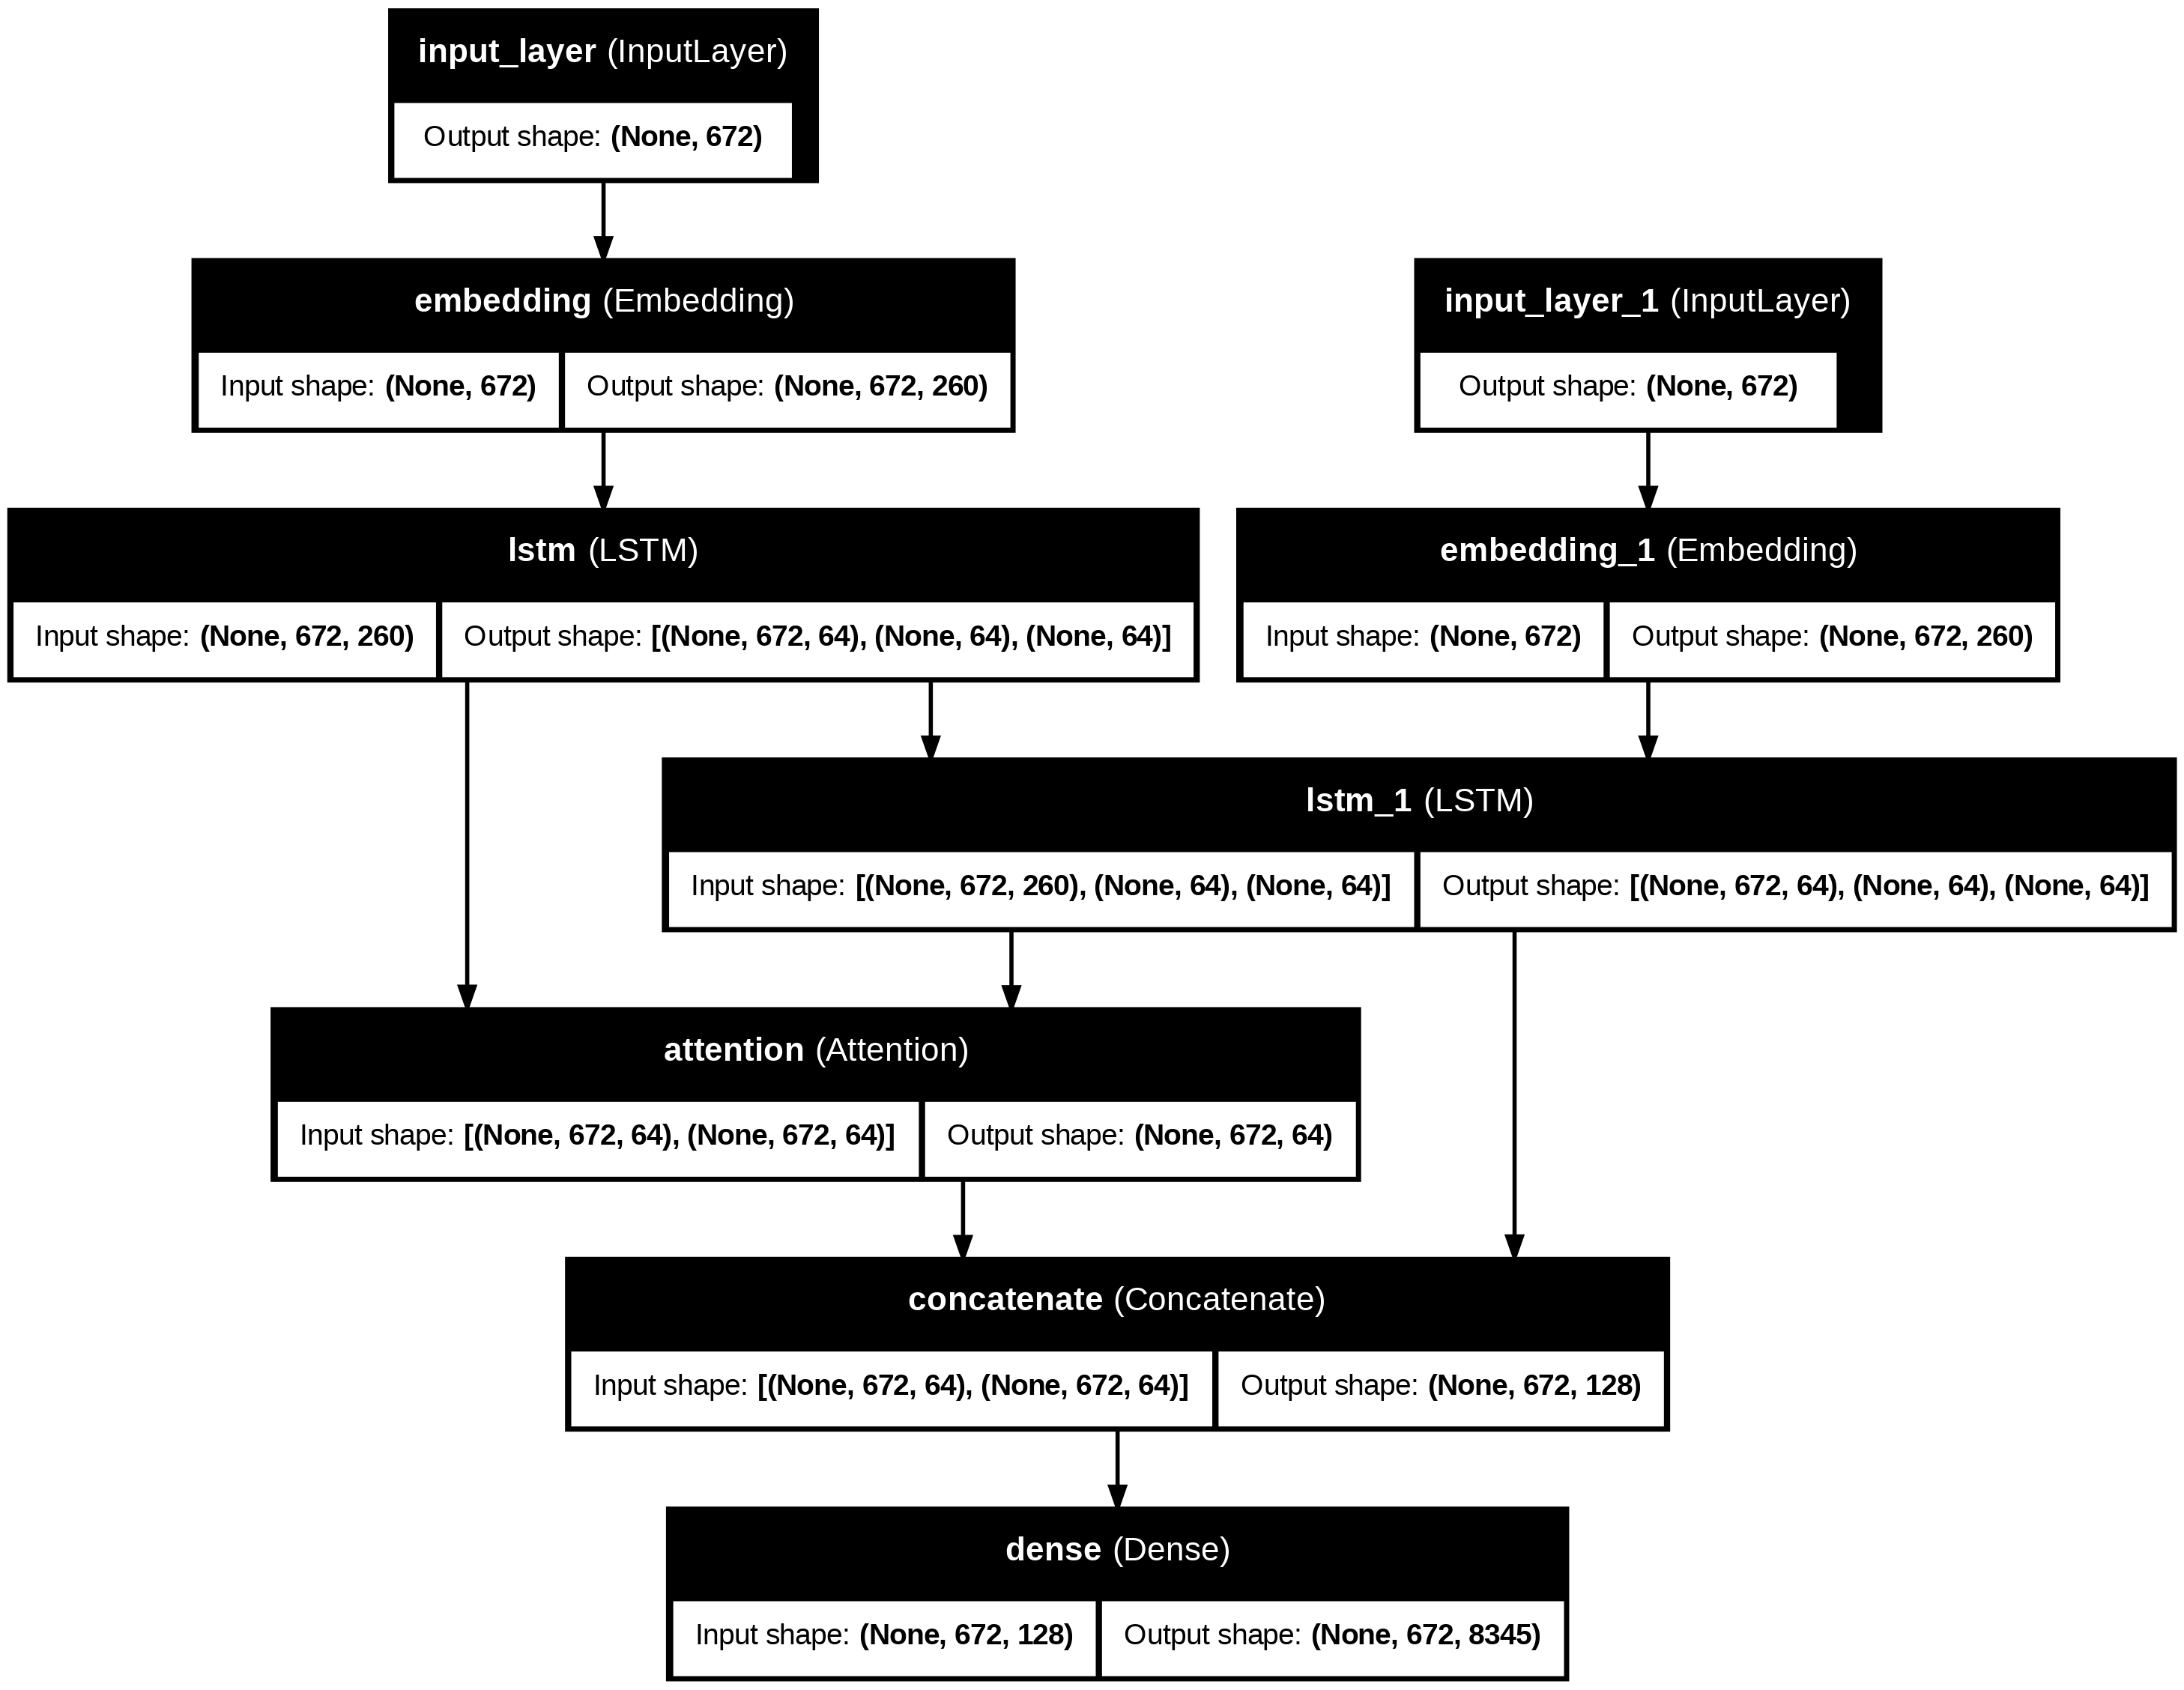

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],
    y=y_train,
    batch_size=16,
    epochs=50,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.8396 - loss: 7.3713 - val_accuracy: 0.9115 - val_loss: 0.8202
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.9146 - loss: 0.7242 - val_accuracy: 0.9115 - val_loss: 0.6151
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.9159 - loss: 0.5745 - val_accuracy: 0.9115 - val_loss: 0.5795
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.9139 - loss: 0.5579 - val_accuracy: 0.9116 - val_loss: 0.5617
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.9174 - loss: 0.5230 - val_accuracy: 0.9136 - val_loss: 0.5432
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.9180 - loss: 0.5141 - val_accuracy: 0.9156 - val_loss: 0.5260
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 260s 5s/step - accuracy: 0.9180 - loss: 0.5048 - val_accuracy: 0.9189 - val_loss: 0.5086
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.9235 - loss: 0.4719 - val_accuracy: 0.9203 - v

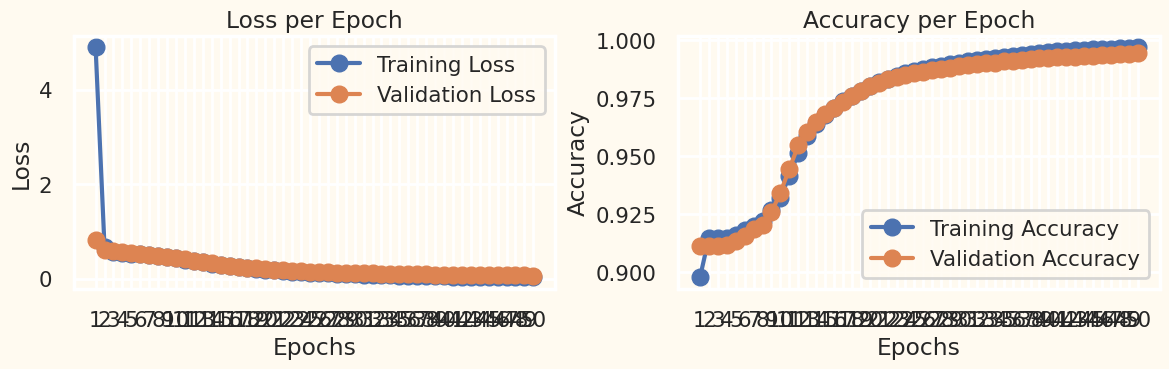

In [ ]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_range)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend()

plt.tight_layout()
plt.show()

**PREDIKSI RINGKASAN**

In [ ]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
# Re-create rev_tok based on the FastText-derived word_index
rev_tok = {idx: word for word, idx in tok.word_index.items()}

# Select a subset of test data
num_samples = 50
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens from predicted summary
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok.get(token, '<unknown>') for token in sample if token != 0 and rev_tok.get(token) not in ['start', 'end']])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Map the dialogue input to sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Map actual summaries from y_test to sentences
actual_summaries = []
for sample in y_test_padded_subset:
    sentence = ' '.join([rev_tok.get(token, '<unknown>') for token in sample if token != 0 and rev_tok.get(token) not in ['start', 'end']])  # Exclude padding, 'start', and 'end' tokens
    actual_summaries.append(sentence)

# Print the dialogue, predicted summary, and actual summary
for idx, (eng_sentence, pred_summary, actual_summary) in enumerate(zip(english_sentences, predicted_sentences, actual_summaries)):
    print(f'Dialogue {idx + 1}: {eng_sentence}')
    print(f'Predicted summary {idx + 1}: {pred_summary}')
    print(f'Actual summary {idx + 1}: {actual_summary}\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step
Shape of predictions: (50, 672, 8345)
Shape of predicted_tokens: (50, 672)
Dialogue 1: when is extra leg room extra leg room 11 of us travelled on emirates from bham to dubaisydney 28 october 23 and returned 16 nov back into bham ek0039 flight we paid for extra leg room seats 80j k h so that we could relax and have sleep on the long journeys ahead of us on 3 of the trips the air stewards were respectful of our space given we were next to where they served the food and drinks with their trolleys they were all quiet during the long flights once drinks and food had been served so myself husband and son could sleep however on the flight from dubai to bham this could not be a worse experience if emirates tried the team were inexperienced bar one professional one of them swearing so we could hear f word as the curtains were left open explaining what she required in men the food and drinks trolley was left next to my husband within an inch of his feet so

In [ ]:
import numpy as np
import os
import pandas as pd # Import pandas for DataFrame display

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
# Re-create rev_tok based on the FastText-derived word_index
rev_tok = {idx: word for word, idx in tok.word_index.items()}

# Select a subset of test data
num_samples = 50
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Fungsi bantu untuk mengubah token menjadi kalimat
def sequence_to_text(sequence, remove_special=True):
    words = []
    for token in sequence:
        if token != 0: # Exclude padding token
            word = rev_tok.get(token, '<unknown>')
            if remove_special:
                # Exclude 'start' and 'end' tokens if they are in the vocabulary
                if word not in ['start', 'end']:
                    words.append(word)
            else:
                words.append(word)
    return ' '.join(words)

# Siapkan list untuk mengisi DataFrame
dialogues = []
predicted_summaries = []
actual_summaries = []

# Proses konversi token menjadi kalimat
for i in range(num_samples):
    dialogue = sequence_to_text(x_test_subset[i])
    predicted_summary = sequence_to_text(predicted_tokens_np[i])
    actual_summary = sequence_to_text(y_test_padded_subset[i])

    dialogues.append(dialogue)
    predicted_summaries.append(predicted_summary)
    actual_summaries.append(actual_summary)

# Buat tabel dengan pandas
df = pd.DataFrame({
    'Dialogue': dialogues,
    'Predicted Summary': predicted_summaries,
    'Actual Summary': actual_summaries
})

# Tampilkan tabel secara rapi di notebook
pd.set_option('display.max_colwidth', None)  # agar kolom panjang tidak terpotong
display(df)

In [ ]:
!pip install rouge-score

In [ ]:
from rouge_score import rouge_scorer
import numpy as np

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Menyimpan skor untuk tiap sampel
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

# Evaluasi per contoh
for ref, pred in zip(actual_summaries, predicted_sentences):
    scores = scorer.score(ref, pred)
    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Hitung skor rata-rata
print("ROUGE-1 Average F1 Score:", np.mean(rouge1_scores))
print("ROUGE-2 Average F1 Score:", np.mean(rouge2_scores))
print("ROUGE-L Average F1 Score:", np.mean(rougeL_scores))

ROUGE-1 Average F1 Score: 0.9462132804250694
ROUGE-2 Average F1 Score: 0.8865843434618774
ROUGE-L Average F1 Score: 0.9462132804250694


In [ ]:
from rouge_score import rouge_scorer
import pandas as pd

# Inisialisasi ROUGE scorer hanya untuk ROUGE-1
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

# Daftar penampung hasil evaluasi
results = []

# Loop setiap pasangan data
for dialogue, actual, predicted in zip(dialogues, actual_summaries, predicted_sentences):
    scores = scorer.score(actual, predicted)
    rouge1 = scores['rouge1']

    results.append({
        'Dialogue': dialogue,
        'Predicted Summary': predicted,
        'Actual Summary': actual,
        'Precision': round(rouge1.precision, 4),
        'Recall': round(rouge1.recall, 4),
        'F1-Score': round(rouge1.fmeasure, 4)
    })

# Buat DataFrame dari hasil
df = pd.DataFrame(results)

# Atur agar kolom panjang ditampilkan penuh
pd.set_option('display.max_colwidth', None)

# Tampilkan tabel
display(df)

,Dialogue,Predicted Summary,Actual Summary,Precision,Recall,F1-Score
0,when is extra leg room extra leg room 11 of us travelled on emirates from bham to dubaisydney 28 october 23 and returned 16 nov back into bham ek0039 flight we paid for extra leg room seats 80j k h so that we could relax and have sleep on the long journeys ahead of us on 3 of the trips the air stewards were respectful of our space given we were next to where they served the food and drinks with their trolleys they were all quiet during the long flights once drinks and food had been served so myself husband and son could sleep however on the flight from dubai to bham this could not be a worse experience if emirates tried the team were inexperienced bar one professional one of them swearing so we could hear f word as the curtains were left open explaining what she required in men the food and drinks trolley was left next to my husband within an inch of his feet so they stepped over him each time apologising for waking him up over the next 3 hours a team of 6 stood in our area having a meeting after 4 hours into the 8 hr flight i politely asked if they could move the trolley so we were not disturbed and it was really disrespectful given we had paid extra for the seat the deputy and mgr came to see us to apologise and talk to their team and moved the trolley i showed the mgr a picture the mgr took my phone and email details to formally respond but 9 days later still no response very disappointing given 11 of us travelled the previous 3 flights were really good,the food and drinks trolley was left next to my husband within an inch of his feet so they stepped over him each time apologising for asking him up over the next 3 hours after 4 hours into the 8 hr flight i politely asked if they could move the trolley so we were not questioned and it was really disrespectful given we had paid extra for the seat,the food and drinks trolley was left next to my husband within an inch of his feet so they stepped over him each time apologising for waking him up over the next 3 hours after 4 hours into the 8 hr flight i politely asked if they could move the trolley so we were not disturbed and it was really disrespectful given we had paid extra for the seat,0.9710,0.9710,0.9710
1,new york to dubai the seat space is excellent however i am disappointed with the extremely poor inflight service i dropped a spoon and was refused additional cutlery further i was allergic to mushrooms and hence wanted to change the meal and was lied about the unavailability of the alternate meal its unfortunate to receive these kind of service from a world class flight,the seat space is excellent however i am disappointed with the extremely poor inflight service further i was endured to mushroom and matter wanted to change the meal and was drink about the unavailability of the alternative meal,the seat space is excellent however i am disappointed with the extremely poor inflight service further i was allergic to mushrooms and hence wanted to change the meal and was lied about the unavailability of the alternate meal,0.9211,0.9211,0.9211
2,birmingham to hong kong via dubai their response to commentscomplains is very very slow takes them days to reply the issue it is not my first time flying with emirates i was very pleased and liked it i recommended it to my families and friends but this time was so disappointed there are 2 weights at the gate the staff asked me to put my luggage on the weight they said my luggage was too heavy they fined me of course it was reasonable to be fined if someones luggage is over weight and even though my luggage was over weight they talked to me in a very rude way they weight passengers selectively i saw some people carried more and bigger bags than me they did not ask them to weigh their luggage,of course it was reasonable to be fined if ones luggage is over weight and even though my luggage was over weight they talked to me in a very rude way they weight passengers ente

In [ ]:
df.to_csv("results.csv", index=False)

In [ ]:
df.to_excel("results.xlsx", index=False)